In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###### 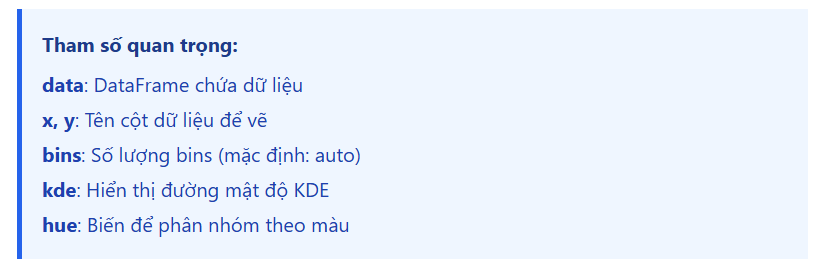

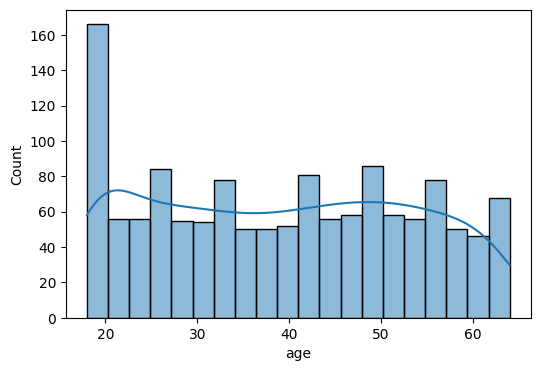

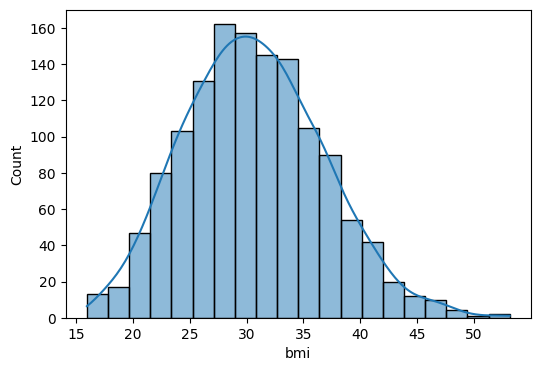

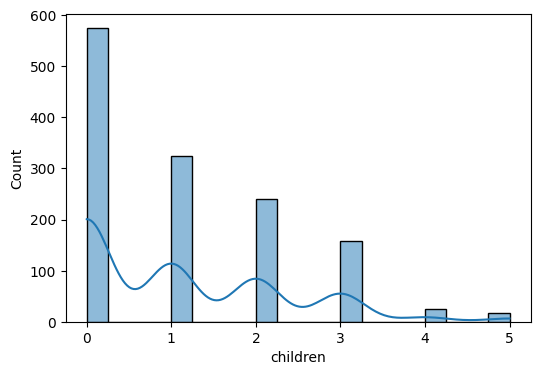

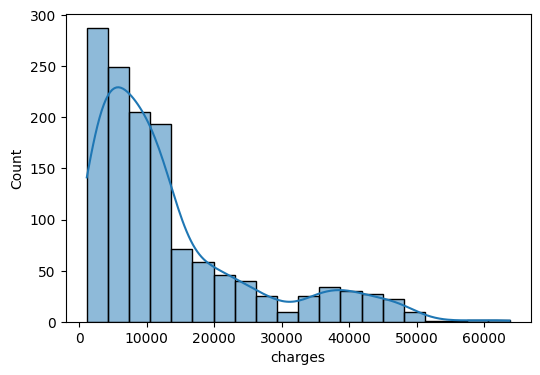

In [5]:
# truc quan hoa bien so
numeric_columns = ['age', "bmi", 'children', 'charges']
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df, x=col, kde=True, bins=20)

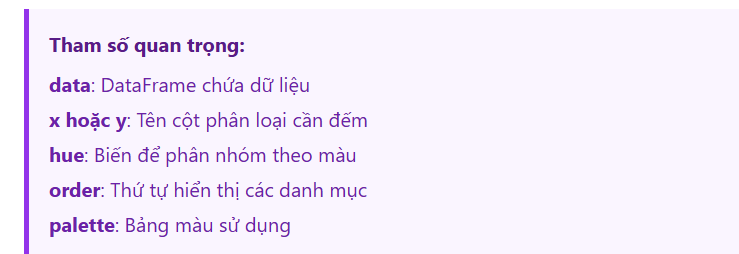

<Axes: xlabel='children', ylabel='count'>

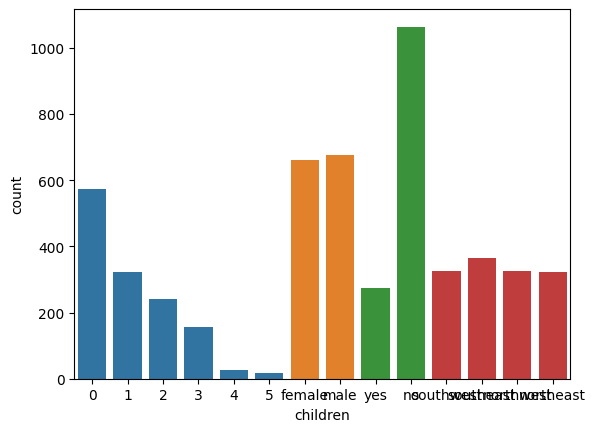

In [6]:
# truc quan bien categories
sns.countplot(df, x='children')
sns.countplot(df, x='sex')
sns.countplot(df, x='smoker')
sns.countplot(df, x='region')

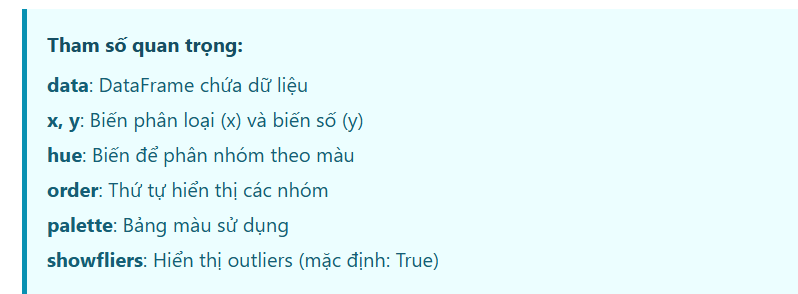

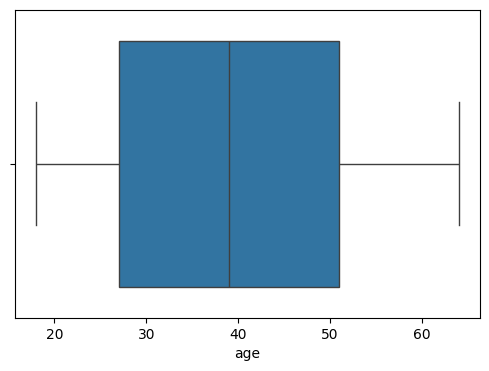

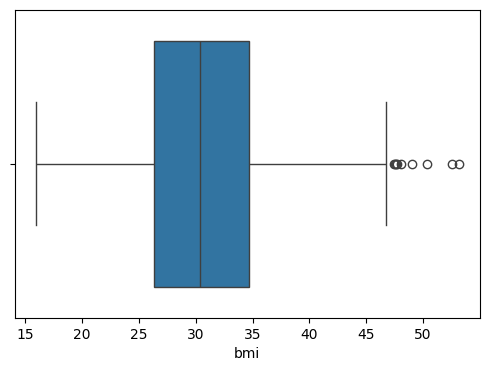

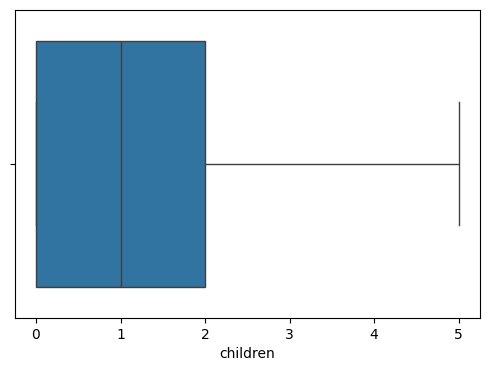

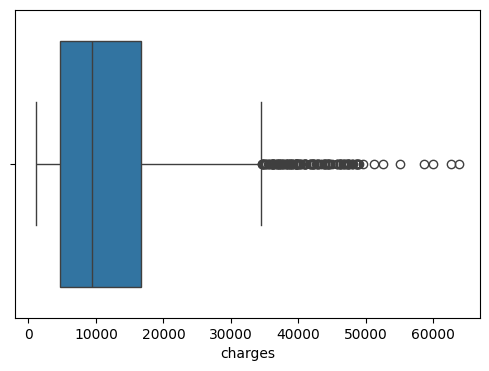

In [7]:
# Dùng boxplot phát hiện giá trị outlier (ngoại lai)
# Chỉ phân tích cho dữ liệu số
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df, x=col)

<Axes: >

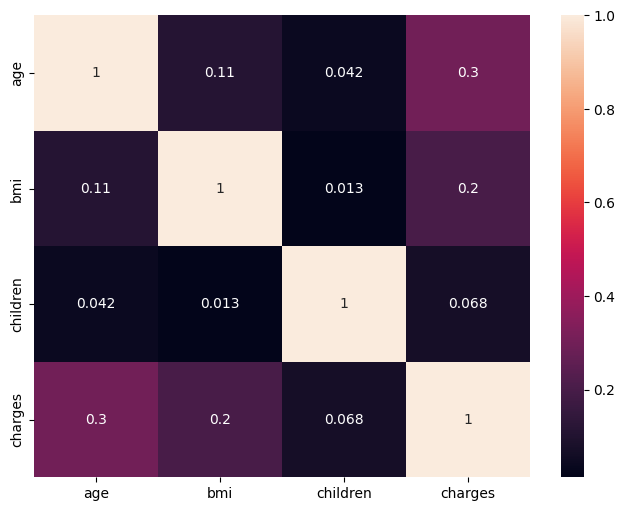

In [8]:
# Dùng heatmap để xem mối tương quan giữa các biến số (numeric)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

### Preprocessing

In [9]:
df_cleaned = df.copy()
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
# Loại bỏ trùng lặp
df_cleaned.drop_duplicates(inplace=True)
df.shape

(1338, 7)

In [11]:
# Kiểm tra null
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
# Chuyển đổi dữ liệu categories sang numeric
# Đối với dữ liệu có 2 giá trị true, fasle -> map

df_cleaned['sex'].value_counts()
# Tương tự với cột Smoker và region
# df_cleaned['smoker'].value_counts()


sex
male      675
female    662
Name: count, dtype: int64

In [13]:
df_cleaned['sex'] = df_cleaned['sex'].map({
    "male": 0,
    "female": 1
})
df_cleaned['smoker'] = df_cleaned['smoker'].map({
    "no": 0,
    "yes": 1
})

df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


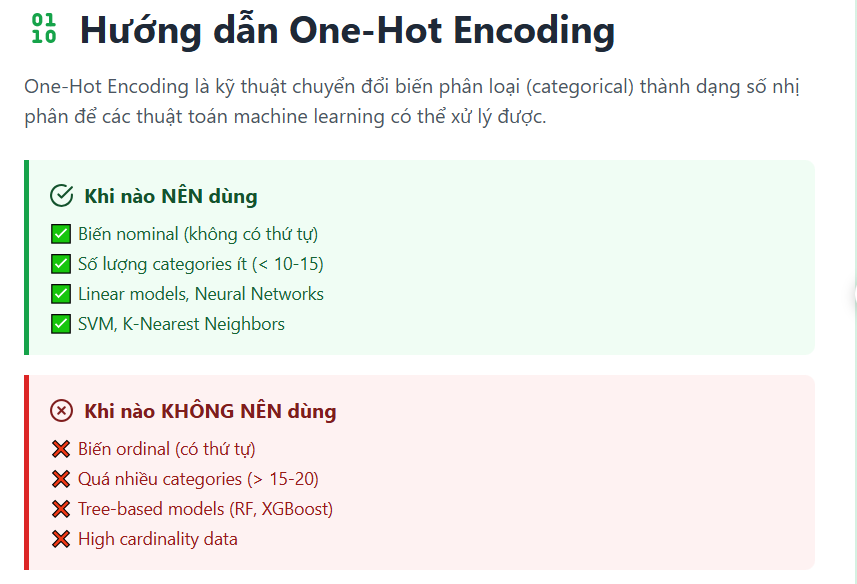

In [14]:
# Đối với dữ liệu không có thứ tự tự nhiên nominal (vd: màu săc, giới tính, quốc gia, thành phố,loại sản phẩm,..), số lương categories ít (< 10-15)
# Không nên dùng với biến original (học lực, size,...), có quá nhiều categories
# Không nên dùng với Tree-based model vì các model xử lý tốt categories data mà không cần one-hot encoding
# Dùng drop_first=True cho Linear Regression
df_cleaned = pd.get_dummies(df_cleaned, columns=['region'], drop_first=True)
df_cleaned

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,True,False,False
1334,18,1,31.920,0,0,2205.98080,False,False,False
1335,18,1,36.850,0,0,1629.83350,False,True,False
1336,21,1,25.800,0,0,2007.94500,False,False,True


In [15]:
df_cleaned = df_cleaned.astype(int)
df_cleaned

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


### Feature engineering and extraction